In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers='EURUSD=X', start='2012-03-11', end='2022-07-10')

data.head(10)

/Users/tahaatiq/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,1.312164,1.314660,1.308216,1.312508,1.312508,0
2012-03-13,1.317176,1.318913,1.305330,1.316829,1.316829,0
2012-03-14,1.308044,1.308900,1.301592,1.308044,1.308044,0
2012-03-15,1.302236,1.308289,1.300492,1.302253,1.302253,0
2012-03-16,1.307873,1.318426,1.305057,1.307873,1.307873,0
2012-03-19,1.317697,1.326480,1.314406,1.317714,1.317714,0
2012-03-20,1.322926,1.324940,1.317523,1.322926,1.322926,0
2012-03-21,1.323977,1.328551,1.318270,1.323767,1.323767,0
2012-03-22,1.321807,1.325557,1.314100,1.321877,1.321877,0


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

/var/folders/wy/tcd919h11l33h541fh7w9dd80000gn/T/ipykernel_1166/2358861191.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [6]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
print(data_set.shape)
print(data.shape)
print(type(data_set))

(2540, 11)
(2540, 11)
<class 'pandas.core.frame.DataFrame'>


In [8]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.75580157 0.75630156 0.75648094 ... 0.49851485 0.         0.75668275]
 [0.75580157 0.74141612 0.74141236 ... 0.49851485 0.         0.74635339]
 [0.7454238  0.73538565 0.7222233  ... 0.49851485 0.         0.71485375]
 ...
 [0.06592108 0.06080625 0.02234078 ... 0.49851485 0.         0.02335445]
 [0.01903626 0.01450207 0.00236022 ... 0.49851485 0.         0.00440699]
 [0.         0.         0.         ... 0.49851485 0.         0.        ]]


/Library/Python/3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and a

In [11]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2540
[[[0.75580157 0.75630156 0.75648094 ... 0.71210136 0.66800326 0.67756551]
  [0.75580157 0.74141612 0.74141236 ... 0.71600697 0.66984505 0.67883232]
  [0.7454238  0.73538565 0.7222233  ... 0.71844604 0.67139777 0.67990663]
  ...
  [0.67404905 0.66353739 0.66854542 ... 0.70664518 0.69237959 0.69602958]
  [0.67448086 0.67308166 0.67916278 ... 0.70244775 0.69174875 0.69566757]
  [0.67932184 0.6848689  0.6827743  ... 0.69928843 0.69127772 0.69541284]]

 [[0.75580157 0.74141612 0.74141236 ... 0.71600697 0.66984505 0.67883232]
  [0.7454238  0.73538565 0.7222233  ... 0.71844604 0.67139777 0.67990663]
  [0.71377652 0.7139252  0.71461972 ... 0.71731488 0.67214941 0.68043085]
  ...
  [0.67448086 0.67308166 0.67916278 ... 0.70244775 0.69174875 0.69566757]
  [0.67932184 0.6848689  0.6827743  ... 0.69928843 0.69127772 0.69541284]
  [0.69357921 0.68009566 0.67577322 ... 0.6978976  0.6911547  0.69539709]]

 [[0.7454238  0.73538565 0.7222233  ... 0.71844604 0.67139777 0.67990663]
  [0.71377652 0.7

In [16]:
#also comprehensions for X
X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
print(X)
print(X.shape)

[[[0.75580157 0.75630156 0.75648094 0.7560581 ]
  [0.75580157 0.74141612 0.74141236 0.75560571]
  [0.7454238  0.73538565 0.7222233  0.74523063]
  ...
  [0.67404905 0.66353739 0.66854542 0.67387437]
  [0.67448086 0.67308166 0.67916278 0.67387437]
  [0.67932184 0.6848689  0.6827743  0.67992515]]

 [[0.75580157 0.74141612 0.74141236 0.75560571]
  [0.7454238  0.73538565 0.7222233  0.74523063]
  [0.71377652 0.7139252  0.71461972 0.71359155]
  ...
  [0.67448086 0.67308166 0.67916278 0.67387437]
  [0.67932184 0.6848689  0.6827743  0.67992515]
  [0.69357921 0.68009566 0.67577322 0.69383595]]

 [[0.7454238  0.73538565 0.7222233  0.74523063]
  [0.71377652 0.7139252  0.71461972 0.71359155]
  [0.7142182  0.72443309 0.71212187 0.71359155]
  ...
  [0.67932184 0.6848689  0.6827743  0.67992515]
  [0.69357921 0.68009566 0.67577322 0.69383595]
  [0.6874791  0.68912382 0.69006363 0.68717073]]

 ...

 [[0.13239976 0.13975226 0.13531535 0.13236545]
  [0.14695201 0.13715184 0.13054544 0.14691393]
  [0.13361

In [17]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2008
(2008, 30, 4)
(502, 30, 4)
(2008, 1)
(502, 1)
[[0.68854937]
 [0.69119185]
 [0.7031564 ]
 ...
 [0.42873095]
 [0.42368244]
 [0.43754049]]


In [22]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(30, 4), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.legacy.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
121/121 [==============================] - 3s 14ms/step - loss: 0.0054 - val_loss: 0.0010
Epoch 2/30
121/121 [==============================] - 1s 11ms/step - loss: 8.0943e-04 - val_loss: 9.7126e-04
Epoch 3/30
121/121 [==============================] - 1s 11ms/step - loss: 7.4894e-04 - val_loss: 8.1541e-04
Epoch 4/30
121/121 [==============================] - 1s 11ms/step - loss: 7.4060e-04 - val_loss: 7.9351e-04
Epoch 5/30
121/121 [==============================] - 1s 11ms/step - loss: 7.0595e-04 - val_loss: 7.2575e-04
Epoch 6/30
121/121 [==============================] - 1s 11ms/step - loss: 6.6877e-04 - val_loss: 8.3045e-04
Epoch 7/30
121/121 [==============================] - 1s 11ms/step - loss: 6.1638e-04 - val_loss: 6.5462e-04
Epoch 8/30
121/121 [==============================] - 1s 11ms/step - loss: 6.2757e-04 - val_loss: 6.3556e-04
Epoch 9/30
121/121 [==============================] - 2s 13ms/step - loss: 6.0674e-04 - val_loss: 6.0769e-04
Epoch 10/30
121/121 [======

In [23]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 5ms/step
[0.41701654] [0.4527957]
[0.4357903] [0.45377035]
[0.44639182] [0.42884188]
[0.43977407] [0.41689065]
[0.42363304] [0.41656101]
[0.41647705] [0.43178643]
[0.41620174] [0.43783716]
[0.4322352] [0.44740772]
[0.4341487] [0.45377035]
[0.4432426] [0.47274792]


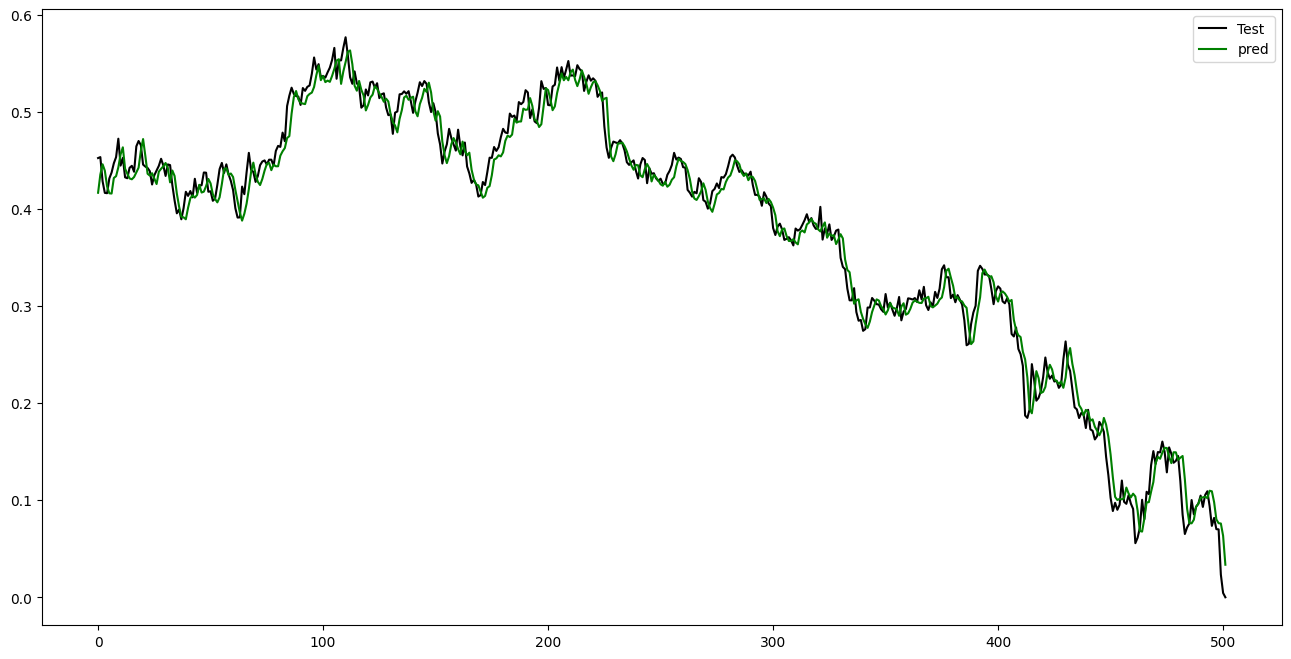

In [24]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()